# Ring Polymer Molecular Dynamics (RPMD)
## Autocorrelation Functions for One-Dimensional Potentials

In [1]:
# Import relevant modules
import numpy as np
import matplotlib.pyplot as plt
import engine.autocorrelation as ac

The following code presents an example implementation of `engine/autocorrelation.py`. Specifically, the `AutoCorrelation` class is used to compute classical and RPMD position autocorrelation functions for one-dimensional potentials.

The ring polymer position autocorrelation function (ACF) is an approximation to the Kubo-transformed quantum ACF:
$$
    \widetilde{C}_{AB}^{(N)}(t) = \langle q(0)q(t)\rangle_N =  \frac{1}{(2\pi\hbar)^N Z_N}\int \text{d}\textbf{p}\int\text{d}\textbf{q}\:\text{e}^{-\beta_N H_N(\textbf{p},\textbf{q})}\bar{q}_N(\textbf{q})\bar{q}_N(\textbf{q}_t)
$$
where the $N$-bead ring polymer Hamiltonian $H_N(\textbf{p},\textbf{q})$ and ring polymer partition function $Z_N$ are given by
$$
    H_N(\textbf{p},\textbf{q}) = \sum_{j=1}^N \left[\frac{p_j^2}{2m} + \frac{1}{2}m\omega_N^2(q_j-q_{j+1})^2 + V(q_j)\right]
$$
$$
    Z_N = \frac{1}{(2\pi\hbar)^N}\int \text{d}\textbf{p}\int \text{d}\textbf{q}\:\text{e}^{-\beta_N H_N(\textbf{p},\textbf{q})}
$$
The ring polymer centroid, $\bar{q}_N(\textbf{q})$, is defined as:
$$
    \bar{q}_N(\textbf{q}) = \frac{1}{N}\sum_{j=1}^N q_j
$$
The classical position ACF can be computed by taking $N=1$ (although in `autocorrelation.py` the classical case is treated separately, since this allows for more efficient evaluation compared to generalising the RPMD code). The `AutoCorrelation` class also takes a function argument, `force`, allowing one to input a custom 1D force function. In the example, we use a cubic force term which arises from the quartic potential $V(x) = x^4 / 4$.

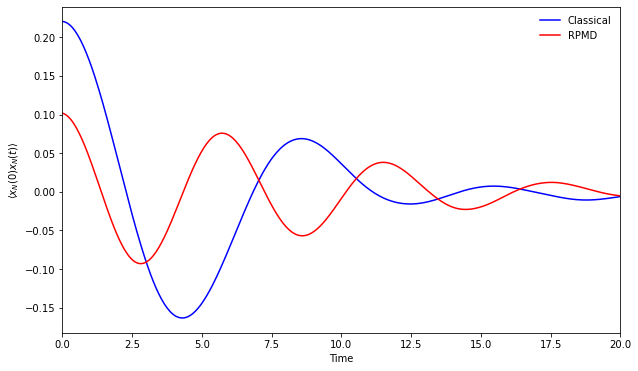

In [8]:
# Define function to be used as force
# Note that force = -dV/dx
# Here we define a force consistent with the strongly anharmonic potential V(x) = (x^4)/4
def force(x):
    return -x**3

# Set simulation parameters (an example)
beta = 8
mass = 1
dt = 0.05
n_samp = 2000
n_equil = 100
n_evol = 400

# Set the number of ring polymer beads
N = 32

# Initialise ACF class and plot classical and RPMD TCFs
acf = ac.AutoCorrelation(force, beta, mass, dt, n_samp, n_equil, n_evol)
classical_xx = acf.classical_autocorrelation()
rpmd_xx = acf.rpmd_autocorrelation(N)

# Plot results
time = np.linspace(0, acf.dt * acf.n_evol, acf.n_evol)
plt.figure(figsize=(10,6))
plt.plot(time, classical_xx, color='b', label='Classical')
plt.plot(time, rpmd_xx, color='r', label='RPMD')
plt.xlim(0, acf.dt * acf.n_evol)
plt.xlabel('Time')
plt.ylabel(r'$\langle x_N(0) x_N(t) \rangle$')
plt.legend(frameon=False)
plt.show()